## *Imports*



In [2]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import os

## *Preprocessing*

Skew angle:  -90.0
Image is not skewed, no rotation needed.


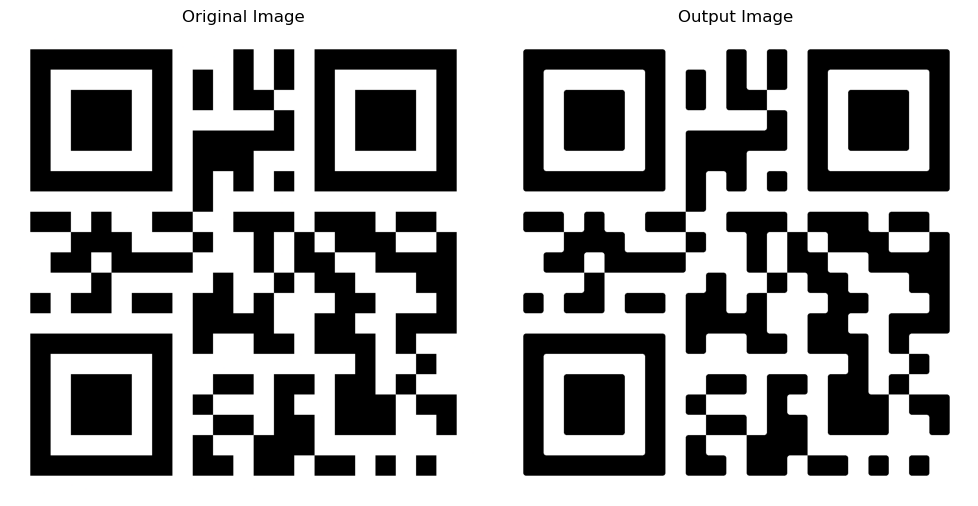

Skew angle:  -8.252528190612793


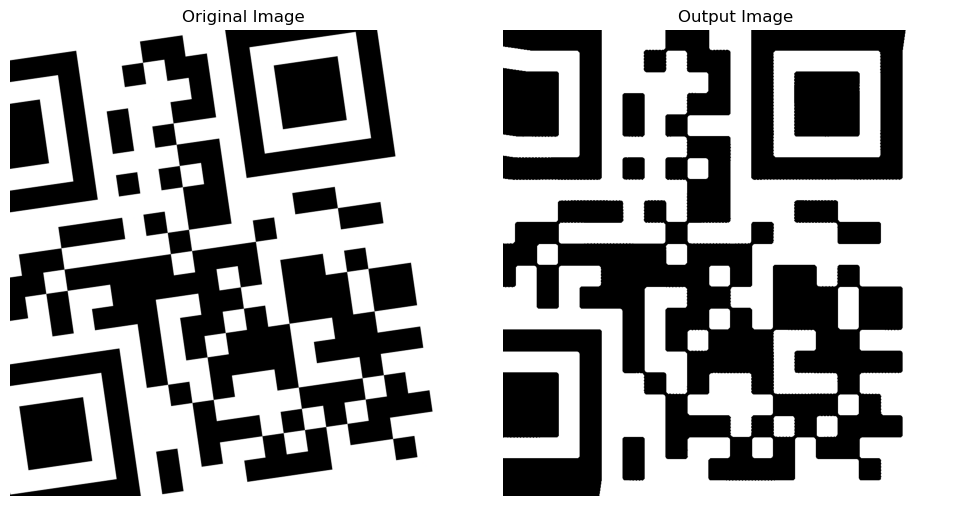

Skew angle:  -0.0


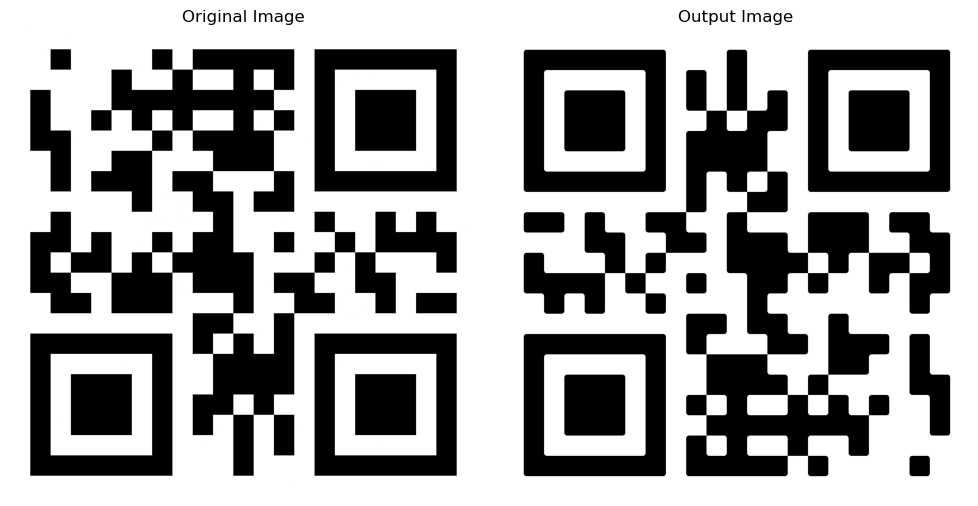

Image is likely inverted. Inverting...
Skew angle:  -90.0
Image is not skewed, no rotation needed.


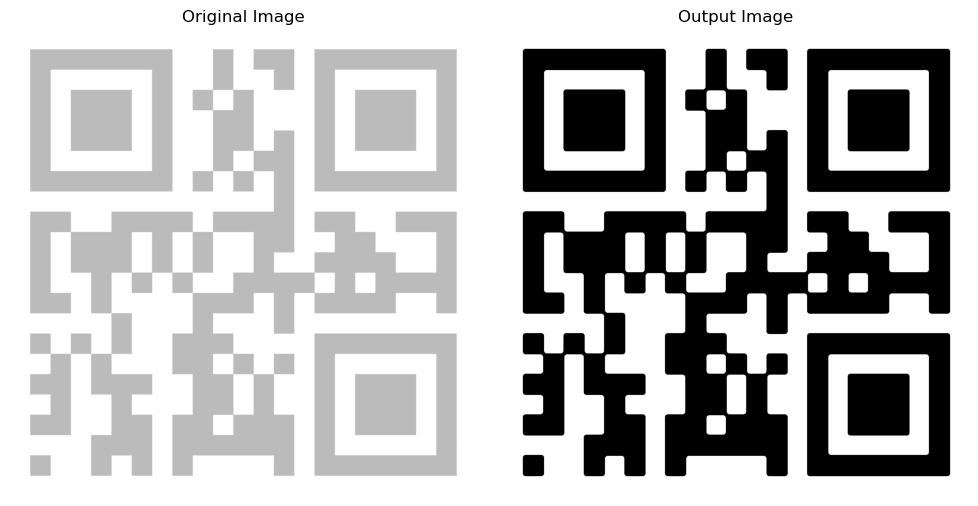

Skew angle:  -90.0
Image is not skewed, no rotation needed.


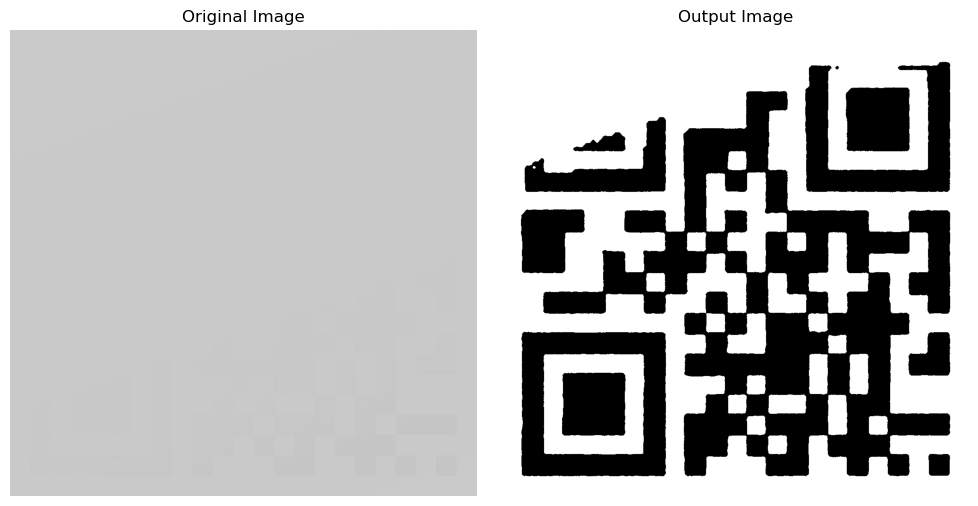

Skew angle:  -90.0
Image is not skewed, no rotation needed.


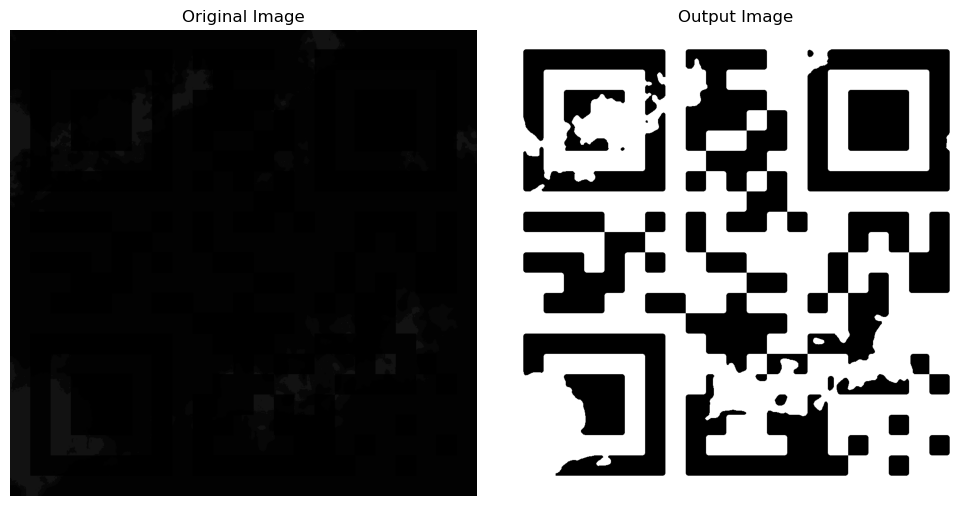

In [32]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Directory containing QR code images
directory = "test cases"
output_directory = "processed_images"  # Directory to store processed images
test_cases = ["01-Getting-started.png", "02-Matsawar-3edel-ya3am.png","03-Leffy-bina-ya-donya.png", "04-Black-mirror.png",
              "10-Gone-With-The-Wind.png","13-2el-noor-2ata3.png"]


# Function to deskew an image
def deskew_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = 255 - gray
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # Compute rotated bounding box
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]

    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    print("Skew angle: ", angle)

    # Check if the angle is close to zero (not skewed much)
    if abs(angle) == 90:
        print("Image is not skewed, no rotation needed.")
        rotated = image  # Keep the original image
    elif abs(angle) == 0:
        #angle is 0:
        #rotate it by 90 degrees
        angle = 180
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    else:
        # Rotate image to deskew
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated


# Function to check and correct image inversion
def check_and_correct_inversion(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate the mean pixel intensity
    mean_intensity = np.mean(gray)
    
    # Check if the image is likely inverted based on mean intensity
    if 3 < mean_intensity < 127:  # Adjust threshold as needed
        print("Image is likely inverted. Inverting...")
        image = cv2.bitwise_not(image)
    
    return image



# Function to load and preprocess images
def preprocess_images():
    for filename in test_cases:
        if filename.endswith(".png") or filename.endswith(".jpg"):
            # Load image
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            
            # Check and correct image inversion
            img = check_and_correct_inversion(img)
            
            # Deskew image
            deskewed_img = deskew_image(img)
            
            # Check if the image is flipped horizontally
           

            # Convert to grayscale
            gray_img = cv2.cvtColor(deskewed_img, cv2.COLOR_BGR2GRAY)
            
            # Histogram equalization
            eq_img = cv2.equalizeHist(gray_img)
            
            # Apply Median filter
            filtered_img = cv2.medianBlur(eq_img, 9)  # Adjust the kernel size as needed
            
            # Apply Binary Thresholding using Otsu's method
            _, thresh_img = cv2.threshold(filtered_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            
            # Save processed image
            output_path = os.path.join(output_directory, filename)
            cv2.imwrite(output_path, thresh_img)
            
            # Plot original and thresholded images (optional)
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.imshow(thresh_img, cmap='gray')
            plt.title("Output Image")
            plt.axis('off')
            
            plt.tight_layout()
            plt.show()


# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Call the preprocessing function
preprocess_images()

## *Test*


Skew angle:  -90.0
Image is not skewed, no rotation needed.


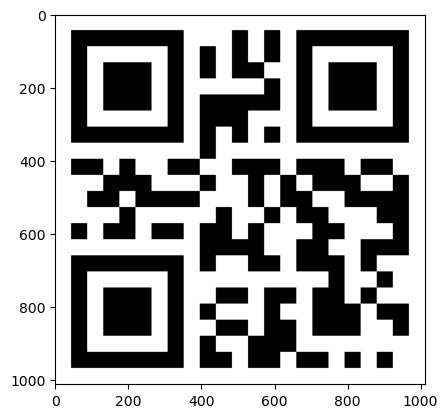

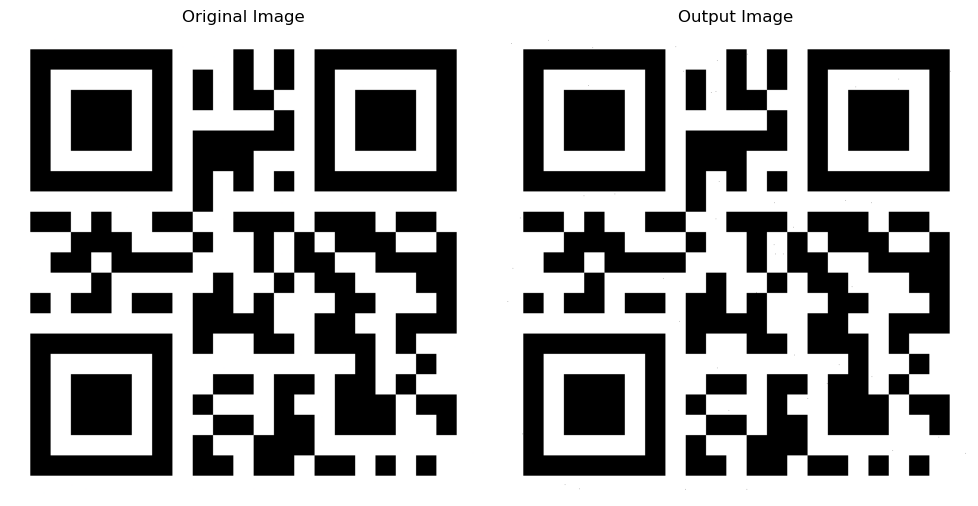

Skew angle:  -8.252528190612793


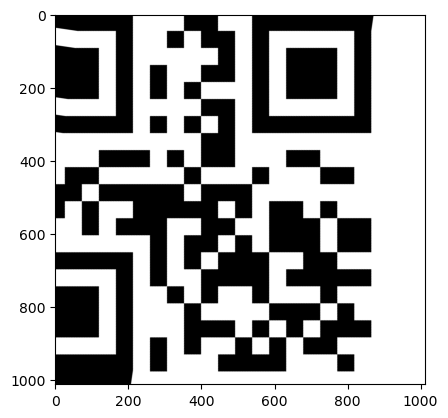

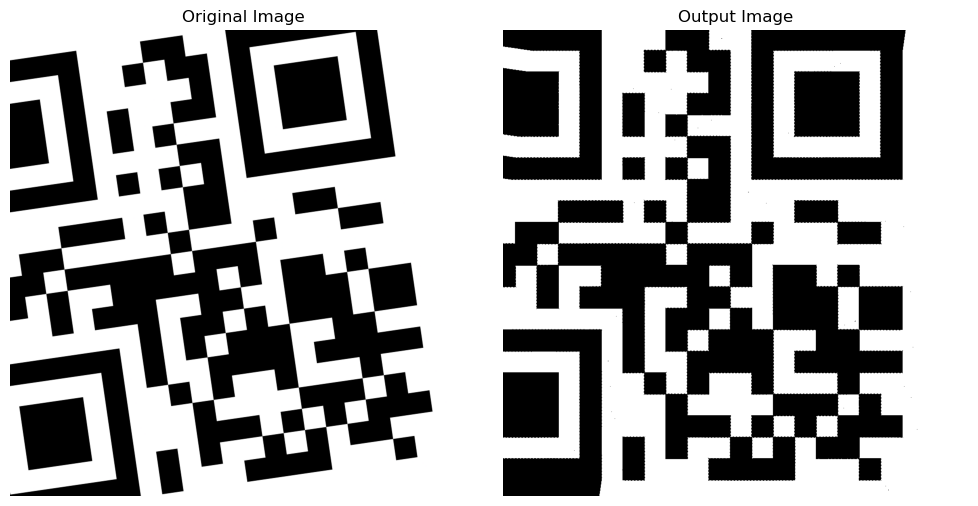

Skew angle:  -0.0


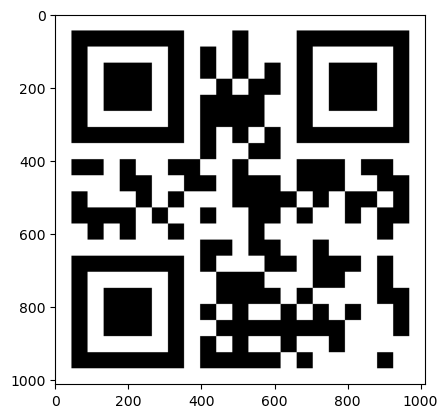

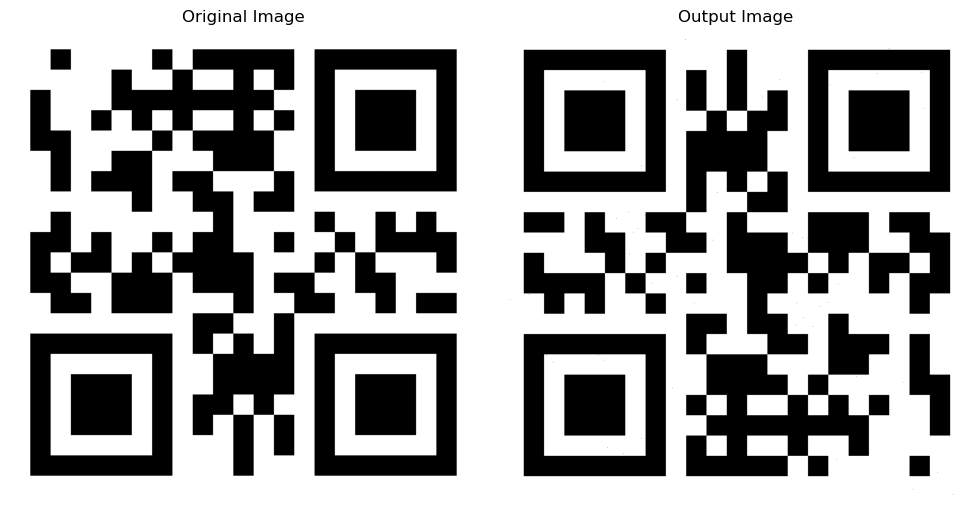

Image is likely inverted. Inverting...
Skew angle:  -90.0
Image is not skewed, no rotation needed.


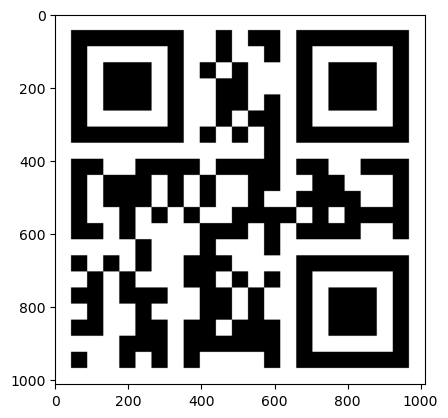

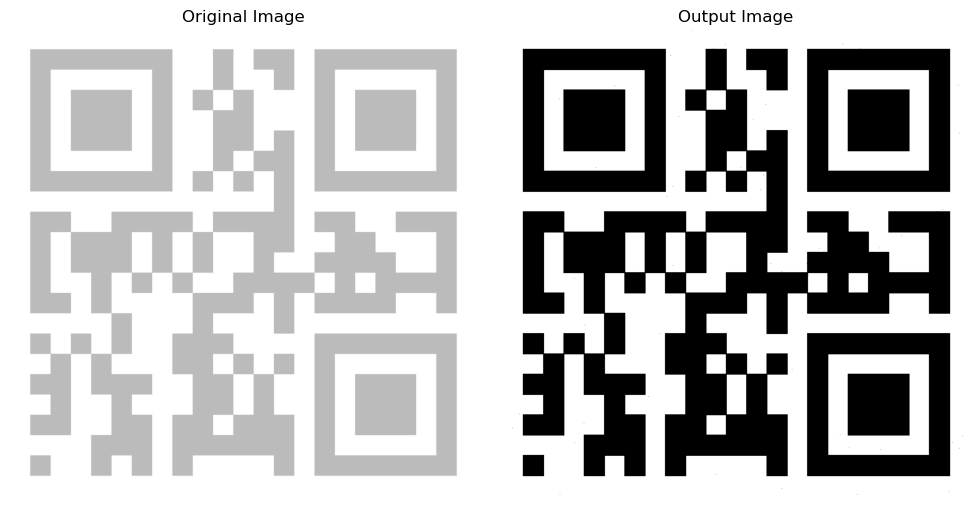

Skew angle:  -90.0
Image is not skewed, no rotation needed.


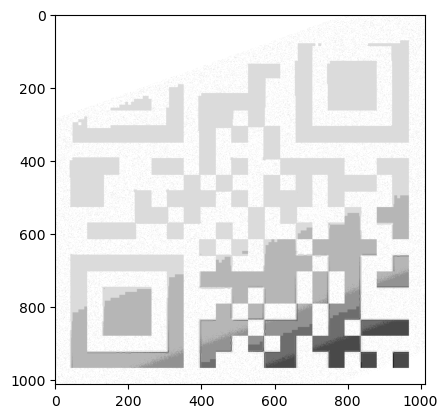

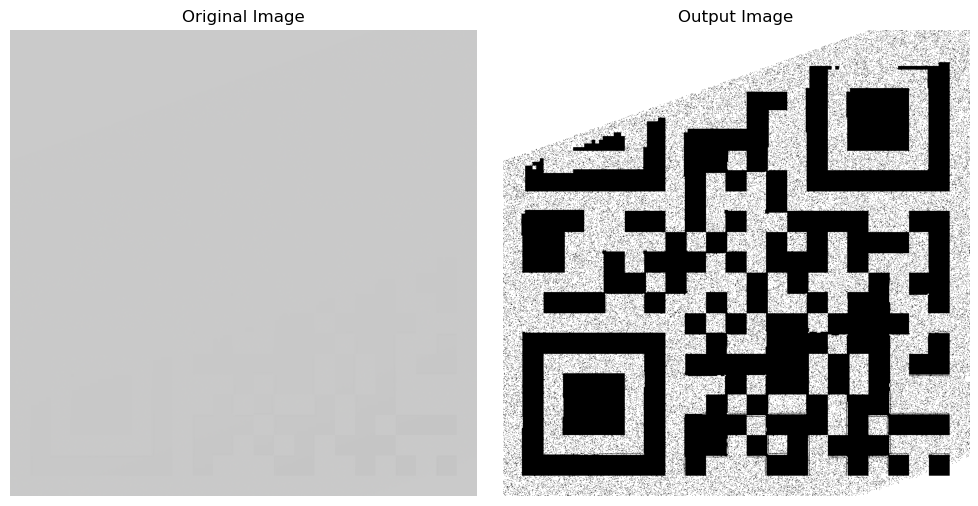

Skew angle:  0.0


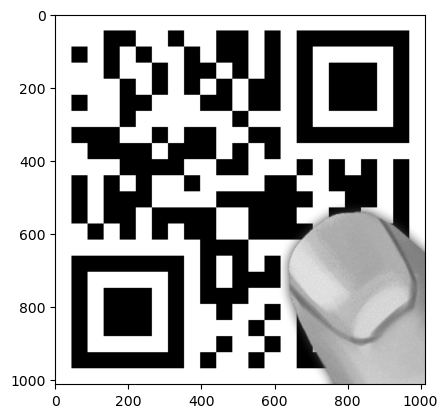

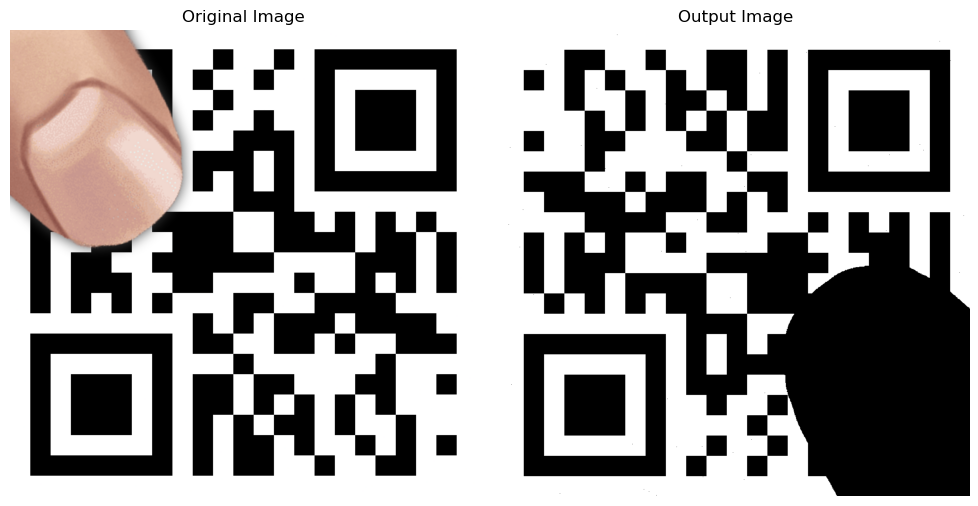

Skew angle:  -90.0
Image is not skewed, no rotation needed.


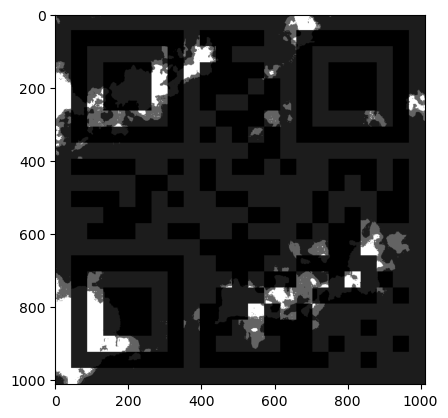

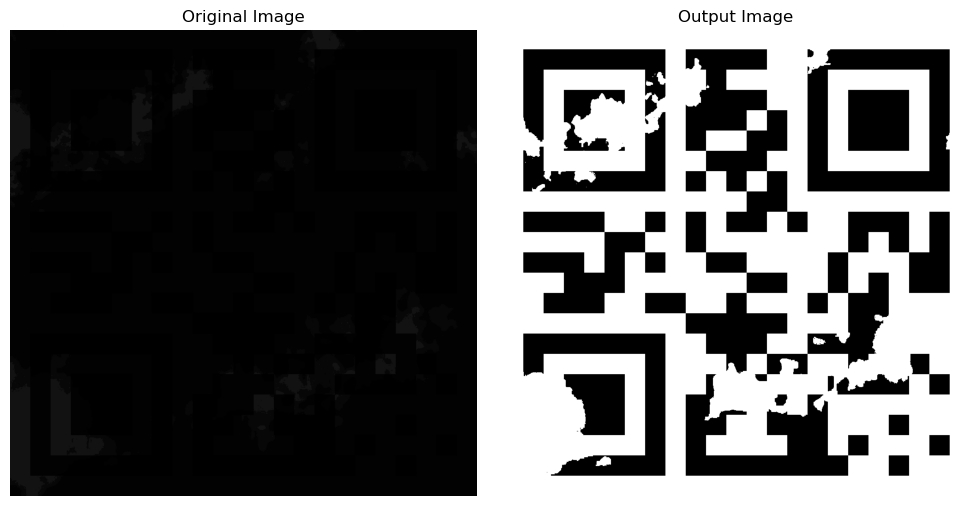

Skew angle:  -13.069317817687988


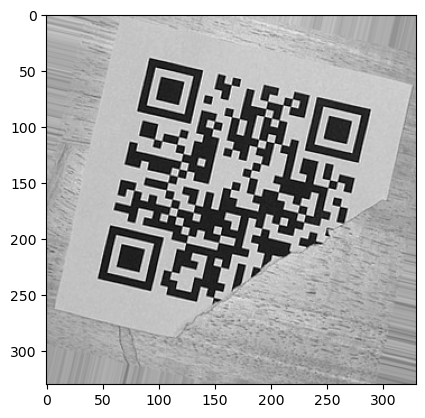

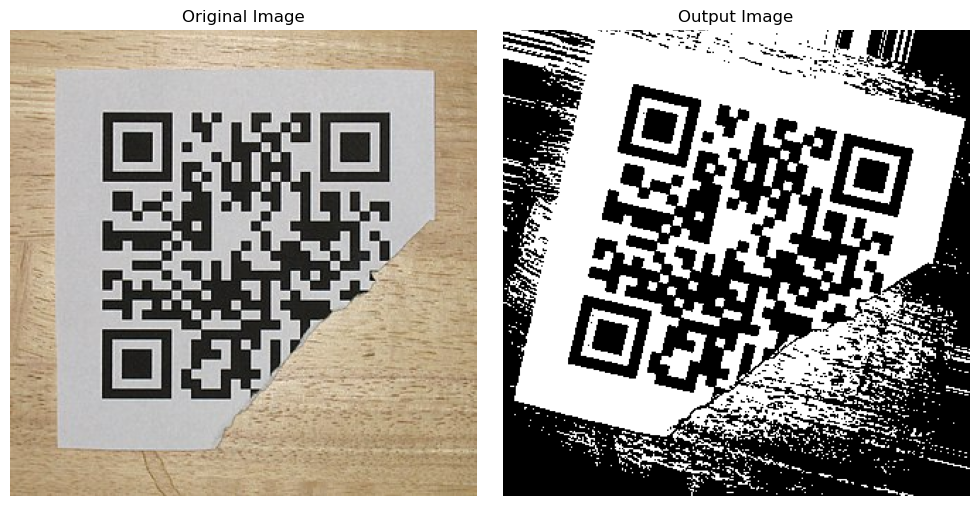

Skew angle:  -9.86580753326416


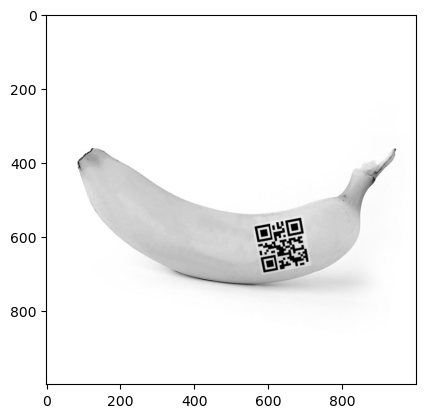

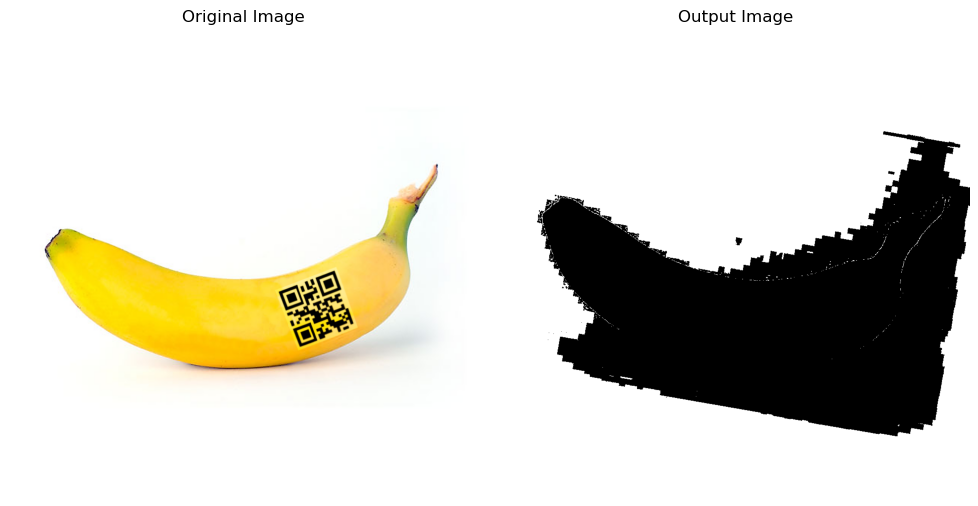

In [28]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Directory containing QR code images
directory = "test cases"
output_directory = "processed_images"  # Directory to store processed images
test_cases = ["01-Getting-started.png", "02-Matsawar-3edel-ya3am.png","03-Leffy-bina-ya-donya.png", "04-Black-mirror.png",
              "10-Gone-With-The-Wind.png", "07-THE-MIGHTY-FINGER.png","13-2el-noor-2ata3.png","15.png","14-BANANAAA!!!.png"]


# Function to deskew an image
def deskew_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = 255 - gray
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # Compute rotated bounding box
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]

    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    print("Skew angle: ", angle)

    # Check if the angle is close to zero (not skewed much)
    if abs(angle) == 90:
        print("Image is not skewed, no rotation needed.")
        rotated = image  # Keep the original image
    elif angle == 0:
        #angle is 0:
        #rotate it by 90 degrees
        angle = 180
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    else:
        # Rotate image to deskew
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated


# Function to check and correct image inversion
def check_and_correct_inversion(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate the mean pixel intensity
    mean_intensity = np.mean(gray)
    
    # Check if the image is likely inverted based on mean intensity
    if 3 < mean_intensity < 127:  # Adjust threshold as needed
        print("Image is likely inverted. Inverting...")
        image = cv2.bitwise_not(image)
    
    return image




# Function to load and preprocess images
def preprocess_images():
    for filename in test_cases:
        if filename.endswith(".png") or filename.endswith(".jpg"):
            # Load image
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            
            # Check and correct image inversion
            img = check_and_correct_inversion(img)
            
            # Deskew image
            deskewed_img = deskew_image(img)
            
            # Check if the image is flipped horizontally
           

            # Convert to grayscale
            gray_img = cv2.cvtColor(deskewed_img, cv2.COLOR_BGR2GRAY)
            plt.imshow(gray_img,cmap='gray')
            # Histogram equalization
            eq_img = cv2.equalizeHist(gray_img)
            
            # Apply Median filter
           # filtered_img = cv2.medianBlur(eq_img, 9)  # Adjust the kernel size as needed
            
            # Apply Binary Thresholding using Otsu's method
            _, thresh_img = cv2.threshold(eq_img, 0, 255, cv2.THRESH_BINARY +cv2.THRESH_OTSU)
            
            # Save processed image
            output_path = os.path.join(output_directory, filename)
            cv2.imwrite(output_path, thresh_img)
            
            # Plot original and thresholded images (optional)
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.imshow(thresh_img, cmap='gray')
            plt.title("Output Image")
            plt.axis('off')
            
            plt.tight_layout()
            plt.show()


# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Call the preprocessing function
preprocess_images()


In [8]:
directory = "test cases"
test_cases = os.listdir(directory)

for img_name in test_cases:
    img_path = os.path.join(directory, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        mean_intensity = np.mean(img)
        print(f"Mean intensity of {img_name}: {mean_intensity}")
    else:
        print(f"Failed to load {img_name}")

Mean intensity of 01-Getting-started.png: 146.05859202091372
Mean intensity of 02-Matsawar-3edel-ya3am.png: 153.91246315622283
Mean intensity of 03-Leffy-bina-ya-donya.png: 147.02267845146775
Mean intensity of 04-Black-mirror.png: 30.001111822816583
Mean intensity of 05-Caesar-cipher.png: 133.7466010639129
Mean intensity of 06-Railfence-cipher.png: 190.62999864602372
Mean intensity of 07-THE-MIGHTY-FINGER.png: 150.00042083925698
Mean intensity of 08-Compresso-Espresso.png: 199.85912137355683
Mean intensity of 09-My-phone-fell-while-taking-this-one-...-or-did-it.png: 123.4355513807954
Mean intensity of 10-Gone-With-The-Wind.png: 201.28995141308255
Mean intensity of 11-weewooweewooweewoo.png: 129.28739708478494
Mean intensity of 12-mal7-w-felfel.png: 128.02396570534353
Mean intensity of 13-2el-noor-2ata3.png: 2.202481291693356
Mean intensity of 14-BANANAAA!!!.png: 238.987946
Mean intensity of 15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg: 154.9809917355372
Mean intensity

## *Detect Contours*

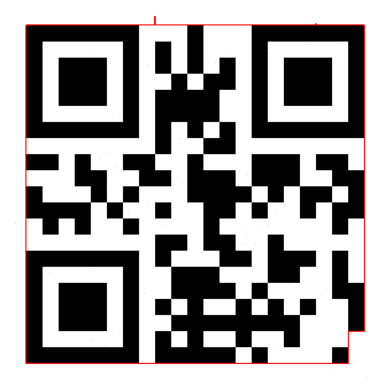

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("processed_images/03-Leffy-bina-ya-donya.png")
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY)
# Find contours in the image
edges = cv2.Canny(thresh, 50, 150)

# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(gray)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)


# find contours in the mask

contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Filter hexagons
        #print(len(approx))
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(image, [selected_contour], -1, (255, 0, 0), 2)

        
# Plot the image using matplotlib
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Example usage
# Load your image

# Call the function


In [ ]:
image = cv2.imread("processed_images/03-Leffy-bina-ya-donya.png")
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY)
# Find contours in the image
edges = cv2.Canny(thresh, 50, 150)

## *Test Case 7*

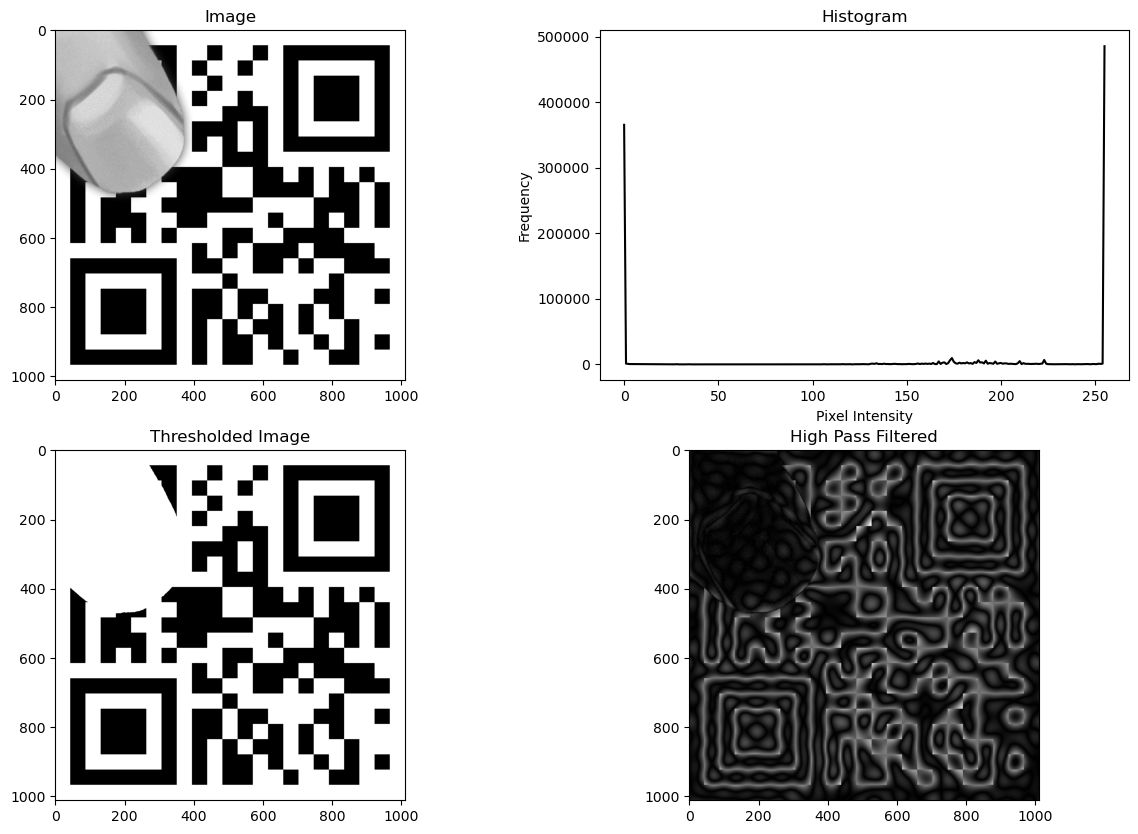

In [3]:
# Load the image
image = cv2.imread('./test cases/07-THE-MIGHTY-FINGER.png', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([image], [0], None, [256], [0,256])

_, thresh_img = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY)

# Calculate the Fourier transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = 20*np.log(np.abs(f_transform_shifted)+500)

# Apply high-pass filter
rows, cols = image.shape
crow, ccol = rows//2, cols//2
mask = np.ones((rows, cols), np.uint8)
r = 15  # Radius of the circular mask
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
mask[mask_area] = 0
f_transform_shifted_filtered = f_transform_shifted * mask

# Calculate the inverse Fourier transform
f_transform_filtered = np.fft.ifftshift(f_transform_shifted_filtered)
image_filtered = np.fft.ifft2(f_transform_filtered)
image_filtered = np.abs(image_filtered)

# Display the image, its histogram, and its Fourier transform
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image')

plt.subplot(2, 2, 2)
plt.plot(hist, color='black')
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.imshow(thresh_img, cmap='gray')
plt.title('Thresholded Image')

plt.subplot(2, 2, 4)
plt.imshow(image_filtered, cmap='gray')
plt.title('High Pass Filtered')

plt.show()

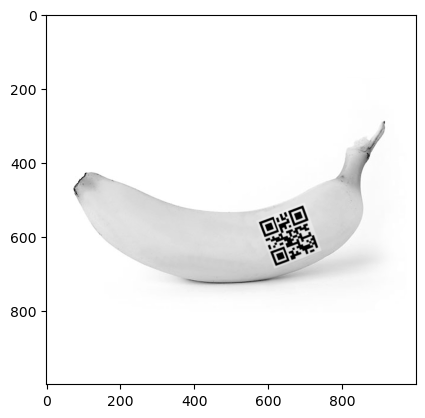

In [6]:
# Load the image
image = cv2.imread('./Test Cases/14-BANANAAA!!!.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

## *Test Case 13*

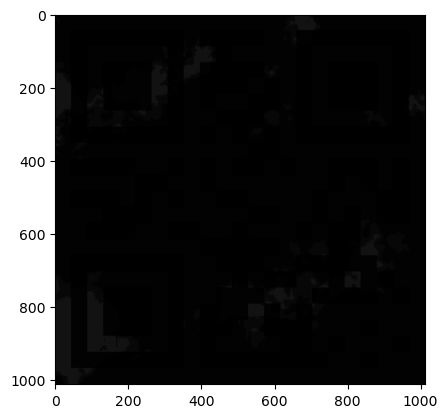

In [18]:
img = cv2.imread("./test cases/13-2el-noor-2ata3.png")
plt.imshow(img)

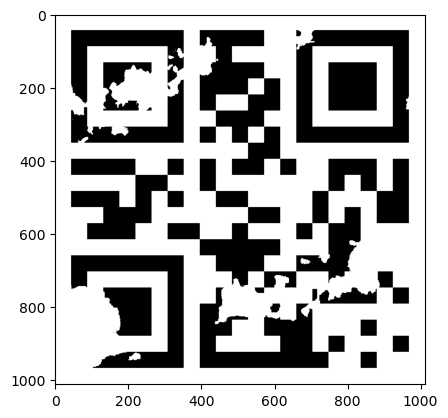

In [20]:
# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Histogram equalization
eq_img = cv2.equalizeHist(gray_img)
# Apply Binary Thresholding using Otsu's method
_, thresh_img = cv2.threshold(eq_img, 0, 255, cv2.THRESH_BINARY +cv2.THRESH_OTSU)
plt.imshow(thresh_img,cmap='gray')
            

## *Test Case 10*

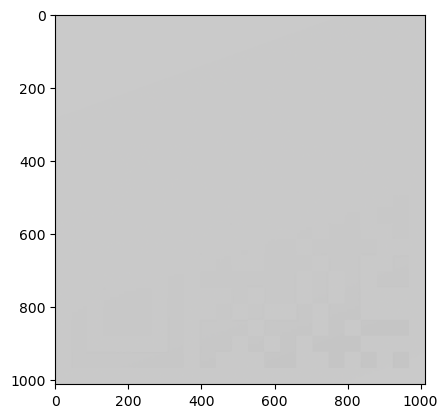

In [68]:
img = cv2.imread("Test Cases/10-Gone-With-The-Wind.png")
plt.imshow(img)

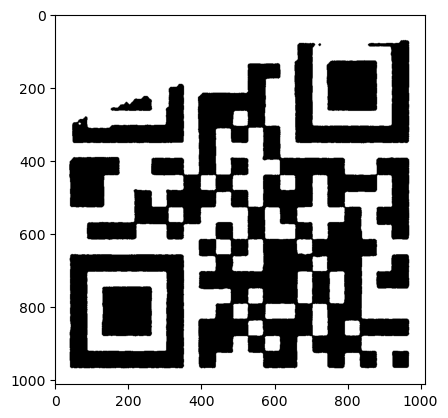

In [69]:
# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Histogram equalization
eq_img = cv2.equalizeHist(gray_img)

# Apply Median filter
filtered_img = cv2.medianBlur(eq_img, 9)  # Adjust the kernel size as needed

# Apply Binary Thresholding using Otsu's method
_, thresh_img = cv2.threshold(filtered_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh_img,cmap='gray')

## *Gray Scale Function*

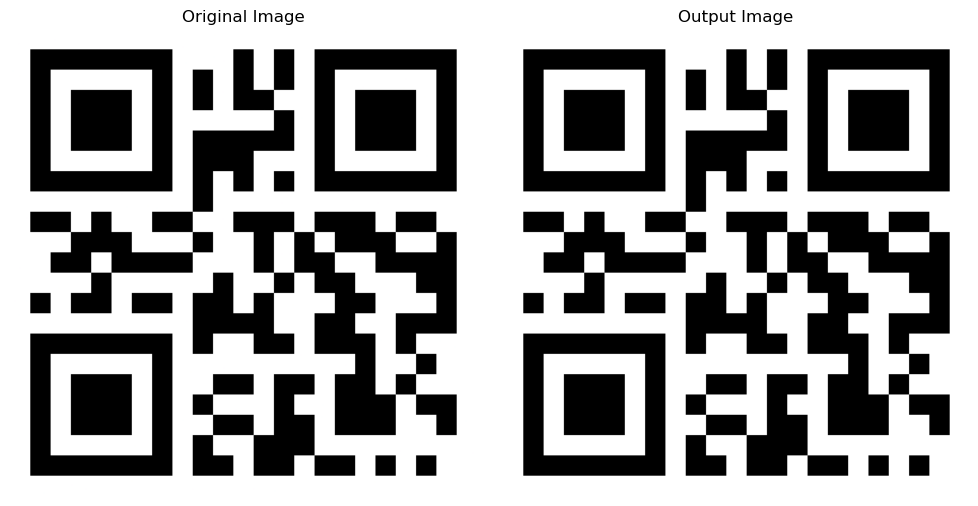

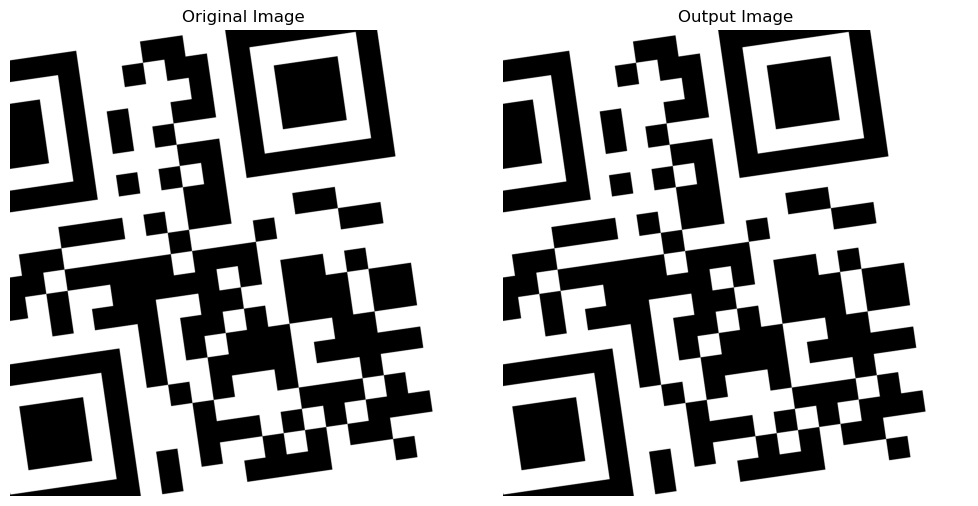

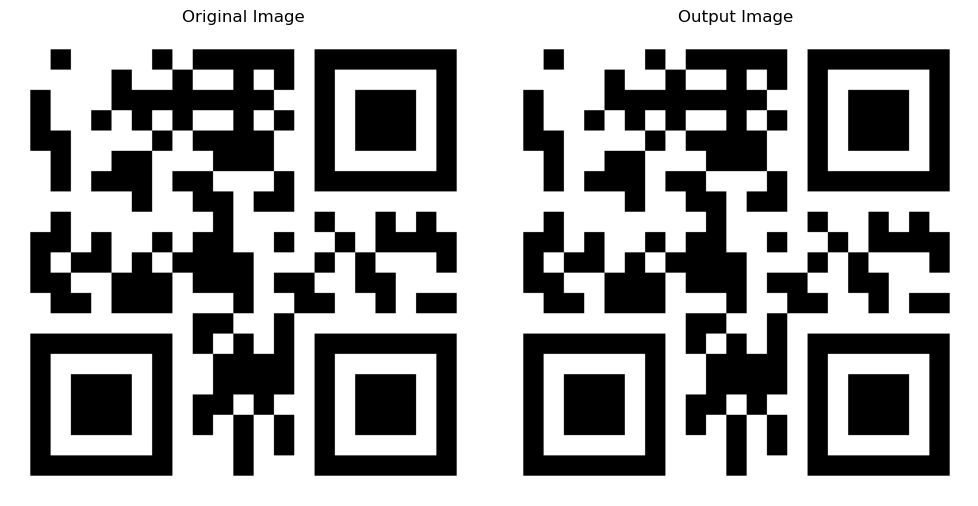

Image is likely inverted. Inverting...


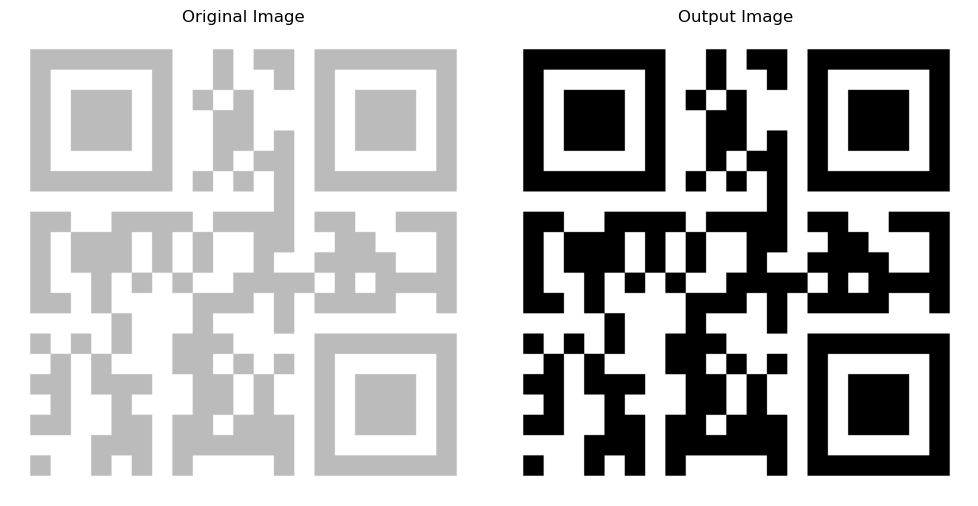

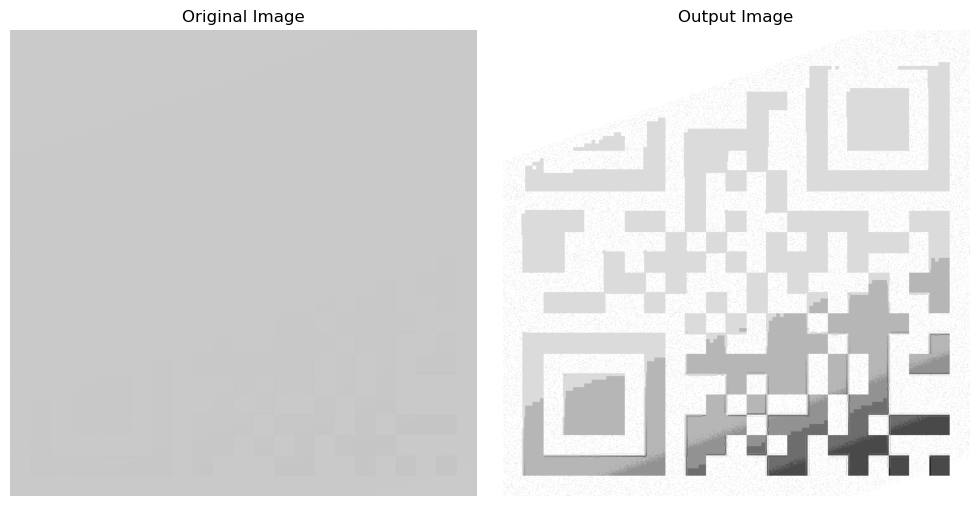

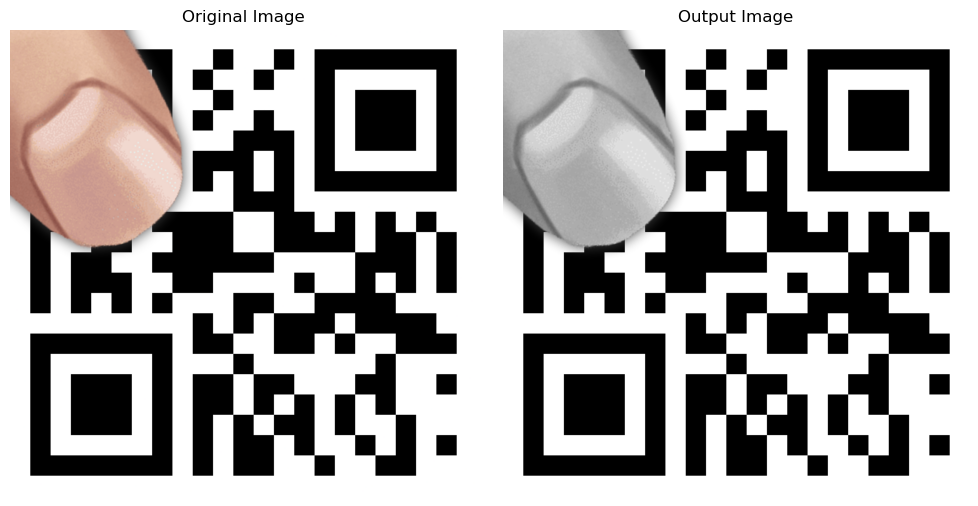

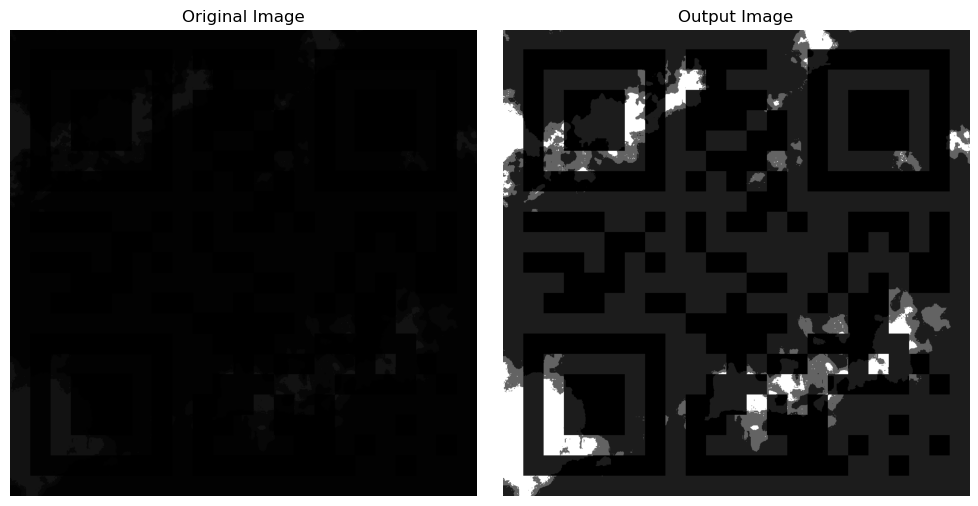

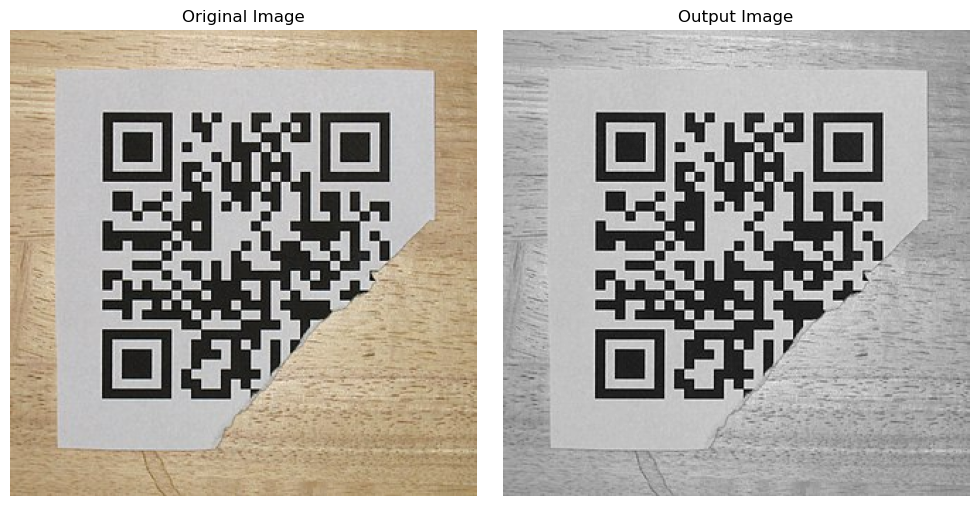

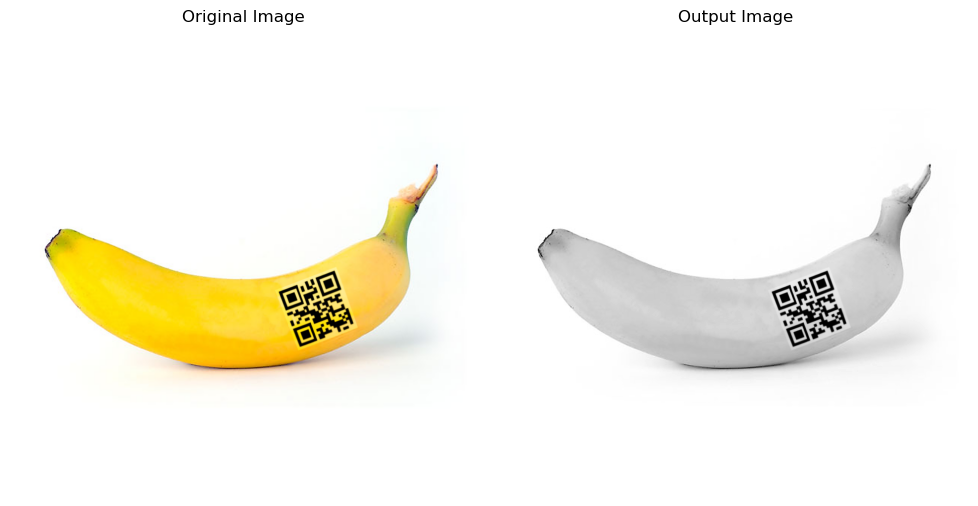

In [29]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Directory containing QR code images
directory = "test cases"
output_directory = "gray_images"  # Directory to store processed images
test_cases = ["01-Getting-started.png", "02-Matsawar-3edel-ya3am.png","03-Leffy-bina-ya-donya.png", "04-Black-mirror.png",
              "10-Gone-With-The-Wind.png", "07-THE-MIGHTY-FINGER.png","13-2el-noor-2ata3.png","15.png","14-BANANAAA!!!.png"]



# Function to check and correct image inversion
def check_and_correct_inversion(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate the mean pixel intensity
    mean_intensity = np.mean(gray)
    
    # Check if the image is likely inverted based on mean intensity
    if 3 < mean_intensity < 127:  # Adjust threshold as needed
        print("Image is likely inverted. Inverting...")
        image = cv2.bitwise_not(image)
    
    return image




# Function to load and preprocess images
def convert_grayscale():
    for filename in test_cases:
        if filename.endswith(".png") or filename.endswith(".jpg"):
            # Load image
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            
            # Check and correct image inversion
            img = check_and_correct_inversion(img)
           
            # Convert to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
         
            # Save processed image
            output_path = os.path.join(output_directory, filename)
            cv2.imwrite(output_path, gray_img)
            
            # Plot original and thresholded images (optional)
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.imshow(gray_img, cmap='gray')
            plt.title("Output Image")
            plt.axis('off')
            
            plt.tight_layout()
            plt.show()


# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Call the preprocessing function
convert_grayscale()


## *Check Noise In Frequency Domain*

The image has noise in the frequency domain.


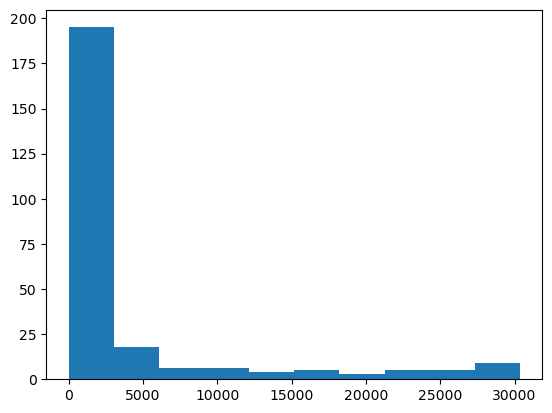

In [40]:
#Steps To do 

# Load the image
#img = cv2.imread('./test cases/11-weewooweewooweewoo.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('./test cases/01-Getting-started.png', cv2.IMREAD_GRAYSCALE)

def has_noise_frequency_domain(image_path, threshold=0.1):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Convert image to frequency domain using Fourier Transform
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    # Calculate magnitude spectrum
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # Plot the histogram of the frequency components
    hist, bins = np.histogram(magnitude_spectrum.ravel(), bins=256, range=(0, 255))

    plt.hist(hist)
    # Calculate the percentage of high-frequency components
    noise_percentage = (np.sum(hist[200:]) / np.sum(hist)) * 100

    # Determine if the image has noise based on the threshold
    if noise_percentage > threshold:
        return True
    else:
        return False

# Example usage
image_path = './test cases/01-Getting-started.png'
#image_path = './test cases/11-weewooweewooweewoo.png'
if has_noise_frequency_domain(image_path):
    print("The image has noise in the frequency domain.")
else:
    print("The image does not have noise in the frequency domain.")


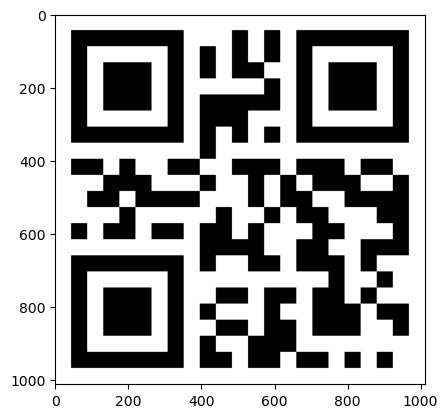

In [47]:
img11= cv2.imread('Test Cases/01-Getting-started.png',cv2.IMREAD_GRAYSCALE)
#img11 = cv2.imread('Test Cases/11-weewooweewooweewoo.png',  cv2.IMREAD_GRAYSCALE)
plt.imshow(img11, cmap="gray")

In [48]:
from scipy.fft import dctn, idctn
from scipy.ndimage import median_filter
def adaptive_frequency_domain_filter(image, r, alpha):
    # Apply Discrete Cosine Transform (DCT)
    dct_image = dctn(image, norm='ortho')

    # Calculate the median of the DCT coefficients
    median_dct = median_filter(np.abs(dct_image), size=(9*r+1, 9*r+1), mode='reflect')

    # Create a mask to identify peaks in the DCT coefficients
    mask = np.abs(dct_image) > alpha * median_dct

    # Apply the median filter to the DCT coefficients based on the mask
    filtered_dct = (1 - mask) * dct_image + mask * median_filter(dct_image, size=(2*r+1, 2*r+1), mode='reflect')

    # Inverse DCT to get the filtered image
    filtered_image = idctn(filtered_dct, norm='ortho')

    # Normalize the filtered image
    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)

    return np.uint8(filtered_image)

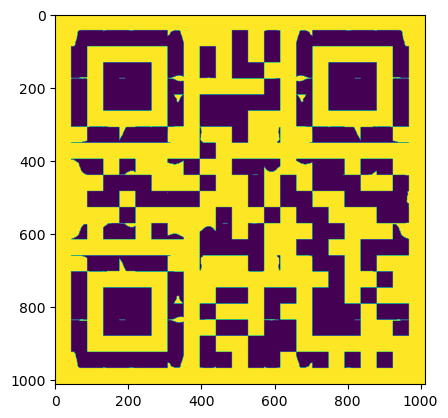

In [50]:
filtered_image = adaptive_frequency_domain_filter(img11, r=1, alpha=6.5)

# # Display and save the filtered image
# cv2.imshow('Filtered Image', filtered_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.imwrite('filtered_image.jpg', filtered_image)

_, binary3_image = cv2.threshold(filtered_image, 100, 255, cv2.THRESH_BINARY)
plt.imshow(binary3_image)

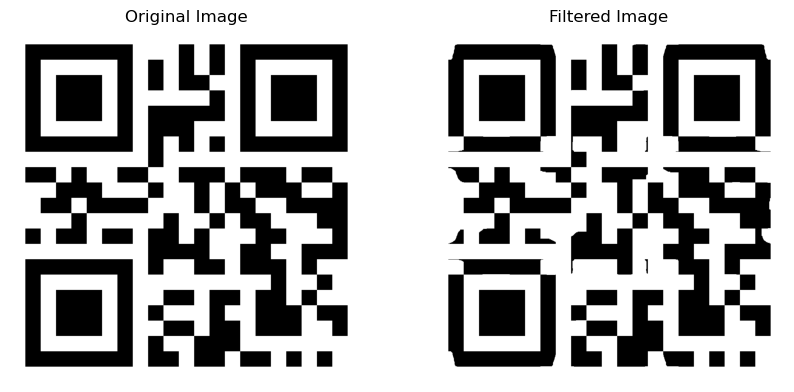

In [51]:
kernel = np.ones((21, 21), np.uint8)

# Apply opening to the binary image
opening_image = cv2.morphologyEx(binary3_image, cv2.MORPH_OPEN, kernel)


# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Adjust the figsize as needed

# Display the original image
axs[0].imshow(img11, cmap='gray')  # Use cmap='gray' for grayscale images
axs[0].set_title('Original Image')
axs[0].axis('off')  # Hide the axes

# Display the filtered image
axs[1].imshow(opening_image, cmap='gray')  # Use cmap='gray' for grayscale images
axs[1].set_title('Filtered Image')
axs[1].axis('off')  # Hide the axes

# Show the plot
plt.show()

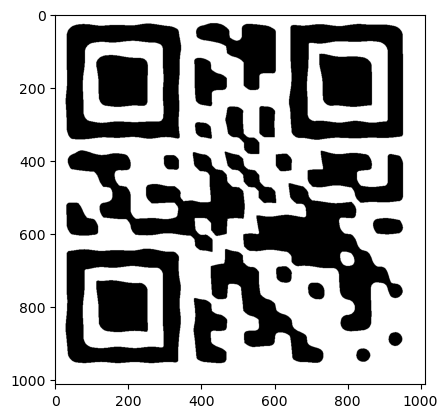

In [67]:
#image = cv2.imread('Test Cases/11-weewooweewooweewoo.png', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('Test Cases/09-My-phone-fell-while-taking-this-one-...-or-did-it.png', cv2.IMREAD_GRAYSCALE)
#image= cv2.imread('Test Cases/03-Leffy-bina-ya-donya.png',cv2.IMREAD_GRAYSCALE)
#cv2.flip(image,1,image)
#cv2.flip(image,0,image)
#image = cv2.imread('Test Cases/01-Getting-started.png', cv2.IMREAD_GRAYSCALE)
# Compute Fourier transform of the image
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Create a filter to remove sinusoidal noise
mask = np.ones_like(image)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask[crow][ccol-11] = 0
mask[crow][ccol+11] = 0


# Apply the filter mask
f_transform_shifted_filtered = f_transform_shifted * mask

# Do inverse Fourier transform
fft_ifft_shift = np.fft.ifftshift(f_transform_shifted_filtered)
image_filtered = np.fft.ifft2(fft_ifft_shift)
image_filtered = np.abs(image_filtered)

# Apply thresholding
ret, thresholded_spectrum = cv2.threshold(image_filtered, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_spectrum, cmap='gray')

plt.show()


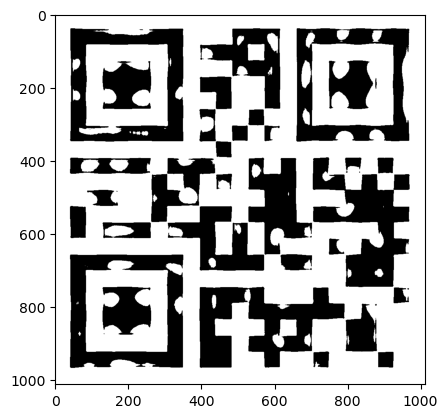

In [60]:
# Read the image
image = cv2.imread('Test Cases/11-weewooweewooweewoo.png', cv2.IMREAD_GRAYSCALE)

# Compute Fourier transform of the image
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Create a mask to remove sinusoidal noise of frequency 11 using a band-stop filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
radius = 11  # Radius of the band-stop filter
mask = np.ones_like(image)
for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - crow)**2 + (j - ccol)**2)
        if radius - 1 < distance < radius + 1:
            mask[i, j] = 0

# Apply the filter mask
f_transform_shifted_filtered = f_transform_shifted * mask

# Do inverse Fourier transform
fft_ifft_shift = np.fft.ifftshift(f_transform_shifted_filtered)
image_filtered = np.fft.ifft2(fft_ifft_shift)
image_filtered = np.abs(image_filtered)

# Apply thresholding
ret, thresholded_spectrum = cv2.threshold(image_filtered, 100, 255, cv2.THRESH_BINARY)

# Display the result
plt.imshow(thresholded_spectrum, cmap='gray')
plt.show()
